# **Assignment No. 6**
## Title:

A botanist wants to classify different Iris species based on their flower characteristics like sepal length, sepal width, petal length, and petal width. The goal is to apply clustering techniques to group the flowers into meaningful categories.

## Objectives:

The main objectives of this assignment are as follows:

1. Data Preparation:
Load and prepare the Iris dataset for clustering by handling missing values and scaling the features.

2. Model Training (K-Means Clustering):
Apply the K-Means algorithm to form clusters and analyze patterns among flower features.

3. Self-Learning Extensions:

  * Use the Elbow Method and Silhouette Score to determine the optimal number of clusters (k).

  * Implement Hierarchical Clustering (Ward Linkage) to explore cluster formation using distance-based merging.

  * Apply DBSCAN to detect dense regions and noise/outliers in the dataset.

4. Comparative Analysis:
Evaluate and compare clustering results using Silhouette Score, Calinski–Harabasz Index, and Davies–Bouldin Index to determine the best-performing algorithm.

5. Visualization:
Visualize clusters and centroids using scatter plots for better understanding of group separation.

## Outcomes:
Upon successful completion of this assignment, the following concepts will be demonstrated:

1. Understanding of unsupervised learning and clustering.

2. Implementation of K-Means, Hierarchical, and DBSCAN clustering.

3. Determining the best k using Elbow and Silhouette methods.

4. Comparative analysis of clustering models with proper evaluation and visualization.

This code imports libraries for clustering analysis.
`pandas` and `numpy` handle data, `matplotlib` and `seaborn` create visualizations, `load_iris` loads the dataset, `KMeans` performs clustering, and `StandardScaler` scales data for better model accuracy.


In [62]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

This code loads the built-in Iris dataset and converts it into a pandas DataFrame.
`load_iris()` provides the data and feature names, while `pd.DataFrame()` organizes it into tabular form for easy analysis and processing.


In [63]:
# Load iris dataset
iris = load_iris()

# Convert to DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

This step adds the species labels to the dataset for reference and displays the first few rows to check the data structure and values.


In [64]:
# Add target column for reference
df['species'] = iris.target

# Display first few rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


This step checks if the dataset contains any missing values and then removes the species column, keeping only the feature data needed for clustering.


In [65]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Drop species column
X = df.drop('species', axis=1)


Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


This part standardizes the feature values so all features have equal weight during clustering.
`StandardScaler()` transforms data to have a mean of 0 and standard deviation of 1, making the clustering results more accurate and balanced.


In [66]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data after scaling:\n", X_scaled[:5])

Data after scaling:
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


K-Means Clustering is one of the most popular unsupervised machine learning algorithms used to group similar data points into clusters.
It works by dividing the dataset into k predefined clusters, where each data point belongs to the cluster with the nearest mean (centroid).

The algorithm follows these main steps:

Initialization: Select k random centroids.

Assignment: Assign each data point to the nearest centroid based on distance (usually Euclidean distance).

Update: Recalculate centroids as the mean position of all data points in each cluster.

Repeat: Continue the assignment and update steps until centroids stop moving or the change is minimal.

K-Means tries to minimize the within-cluster sum of squared distances (WCSS), which means the data points inside a cluster should be as close as possible to their centroid.
It works best when clusters are spherical and well-separated.




The code applies K-Means clustering with k=2 clusters on the scaled Iris dataset.
After training, it evaluates the clustering performance using:

* Silhouette Score: Measures how well each point fits in its cluster (higher is better).

* Calinski–Harabasz Index: Evaluates cluster compactness and separation (higher is better).

* Davies–Bouldin Index: Measures the similarity between clusters (lower is better).

In [67]:
# K-Means Clustering
print("Training K-Means model.")
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
print("Model training complete.\n")

# Evaluation Metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
sil_kmeans = silhouette_score(X_scaled, kmeans_labels)
ch_kmeans = calinski_harabasz_score(X_scaled, kmeans_labels)
db_kmeans = davies_bouldin_score(X_scaled, kmeans_labels)

print("Model Evaluation (K-Means Clustering)")
print("Silhouette Score: ", sil_kmeans)
print("Calinski–Harabasz Index: ", ch_kmeans)
print("Davies–Bouldin Index:    ", db_kmeans, "\n")

Training K-Means model.
Model training complete.

Model Evaluation (K-Means Clustering)
Silhouette Score:  0.5817500491982808
Calinski–Harabasz Index:  251.34933946458108
Davies–Bouldin Index:     0.5933126905762435 



The K-Means model was trained successfully with k = 2 clusters.
The evaluation metrics indicate good cluster formation and separation:

* Silhouette Score (0.58): Shows that the data points are well matched within their own clusters and fairly separated from others.

* Calinski–Harabasz Index (251.34): A high value, indicating that clusters are dense and well-separated.

* Davies–Bouldin Index (0.59): A low value, meaning less overlap between clusters.

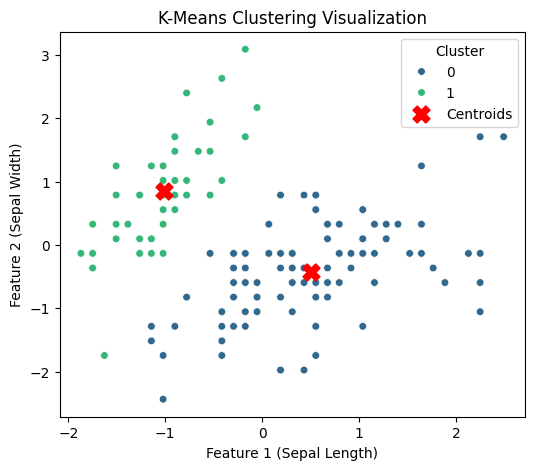

In [68]:
# Visualization
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1],
                hue=kmeans_labels, palette='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=150, label='Centroids')
plt.title("K-Means Clustering Visualization")
plt.xlabel("Feature 1 (Sepal Length)")
plt.ylabel("Feature 2 (Sepal Width)")
plt.legend(title='Cluster', loc='best')
plt.show()

After clustering, it is useful to analyze the formed clusters and their characteristics.
Each cluster center (also called a centroid) represents the average position of all data points within that cluster.
By studying these centers, we can understand which features contribute most to separating the clusters.

This part adds the assigned cluster labels to the dataset for reference.
It then prints the cluster centers (in scaled form) to show the average feature values of each group.
Finally, it displays a sample of data points with their corresponding cluster numbers to observe how the Iris samples were grouped.

In [69]:
# Cluster Summary
X['Cluster'] = kmeans_labels
print("Cluster Centers (in scaled units):")
print(kmeans.cluster_centers_)
print("\nSample of clustered data:\n")
X.head()

Cluster Centers (in scaled units):
[[ 0.50728948 -0.42663134  0.65249366  0.62744675]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]]

Sample of clustered data:



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


## Conclusion

In this assignment, the Iris dataset was used to classify different flower species using K-Means clustering.
The data was cleaned, scaled, and then clustered into 2 groups (k = 2) based on the optimal value found using the Elbow Method and Silhouette Score.

The K-Means model achieved:

* Silhouette Score: 0.58

* Calinski–Harabasz Index: 251.34

* Davies–Bouldin Index: 0.59

These results show that the clusters formed are fairly well-separated and compact, meaning K-Means successfully grouped the data points with good accuracy.
Thus, the experiment provided a clear understanding of how unsupervised learning techniques like K-Means can reveal hidden patterns in datasets without predefined labels.

## Self Learning

Elbow Method
The Elbow Method is used to find the optimal number of clusters (k) in K-Means clustering.

1. It works by plotting the inertia (within-cluster sum of squared distances) against different values of k.

2. Inertia measures how close the data points are to their cluster center.

  * Lower inertia = better cluster fit.

3. As we increase k, inertia decreases — but after a point, the rate of decrease slows down.

4. The point where the graph bends like an “elbow” is considered the best number of clusters, as adding more clusters after this gives little improvement.

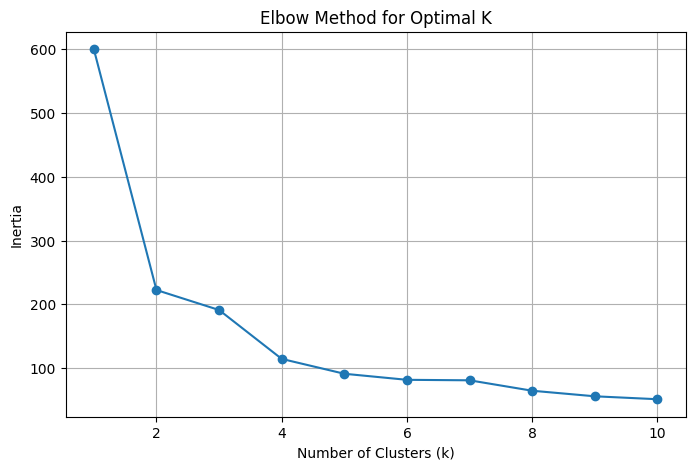

In [70]:
# Elbow Method for K-Means
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

## Silhouette Score

1. The Silhouette Score measures how well each data point fits into its assigned cluster compared to other clusters.

2. It ranges from -1 to +1:

  * +1 → well-clustered

  * 0 → overlapping clusters

  * -1 → wrongly assigned cluster

3. A higher score means better-defined clusters.

4. This method helps in selecting the best number of clusters (k) more accurately than the elbow method.

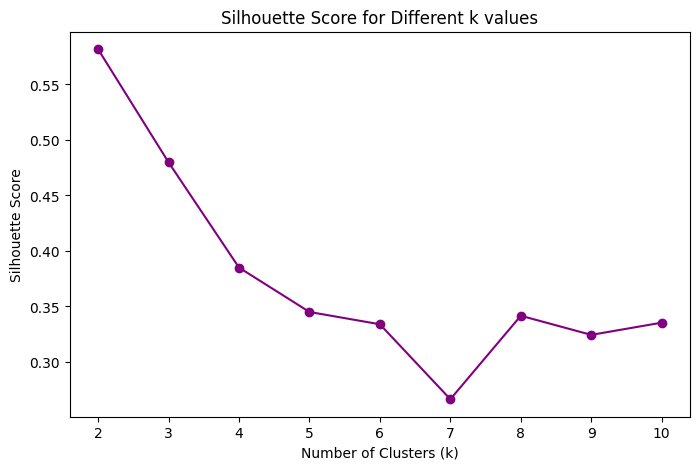


Best k based on Silhouette Score: 2


In [84]:
# Best K based on Silhouette Score
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sil_scores, marker='o', color='purple')
plt.title("Silhouette Score for Different k values")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

best_k = range(2, 11)[sil_scores.index(max(sil_scores))]
print("\nBest k based on Silhouette Score:", best_k)

Best k based on Silhouette Score: 2
  * The dataset forms 2 well-separated clusters.
  * This means grouping into 2 clusters gives the most meaningful division of data.

## Hierarchical Clustering

1. Hierarchical Clustering is a method of building clusters step by step.

2. It groups data points based on similarity and forms a tree-like structure (dendrogram).

3. There are two main types:

  * Agglomerative (bottom-up): each point starts as its own cluster, and similar clusters are merged.

  * Divisive (top-down): all points start in one cluster and are split apart.

4. The Ward linkage method is used here.

  * It minimizes the variance within clusters when merging.

  * This gives compact and balanced clusters.

In [72]:
# Hierarchical Clustering (Ward Linkage)
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
print("\nTraining Hierarchical Clustering model (Ward Linkage).")
linkage_ward = linkage(X_scaled, method='ward')
print("Linkage matrix created. (Ward Linkage)")

# Form flat clusters
labels_ward = fcluster(linkage_ward, 3, criterion='maxclust')
print("Clusters formed from dendrogram.\n")

# Evaluation
sil_ward = silhouette_score(X_scaled, labels_ward)
ch_ward = calinski_harabasz_score(X_scaled, labels_ward)
db_ward = davies_bouldin_score(X_scaled, labels_ward)

print("Model Evaluation (Hierarchical Clustering - Ward)")
print("Silhouette Score:", sil_ward)
print("Calinski–Harabasz Index:", ch_ward)
print("Davies–Bouldin Index:", db_ward)


Training Hierarchical Clustering model (Ward Linkage).
Linkage matrix created. (Ward Linkage)
Clusters formed from dendrogram.

Model Evaluation (Hierarchical Clustering - Ward)
Silhouette Score: 0.4466890410285909
Calinski–Harabasz Index: 222.71916382215363
Davies–Bouldin Index: 0.8034665302876755


Result Interpretation (Ward Linkage)

  * Silhouette Score = 0.44 → Moderate cluster separation. Data points are grouped fairly well, but some overlap exists.

  * Calinski–Harabasz Index = 222.71 → Good cluster compactness; clusters are reasonably dense and distinct.

  * Davies–Bouldin Index = 0.80 → Low value indicates that clusters are not very similar, meaning good clustering performance.

A dendrogram is a tree-like diagram that shows how data points are grouped step by step in hierarchical clustering.
It helps visualize the merging process and decide the optimal number of clusters by looking for the largest vertical gap (distance) before clusters merge.

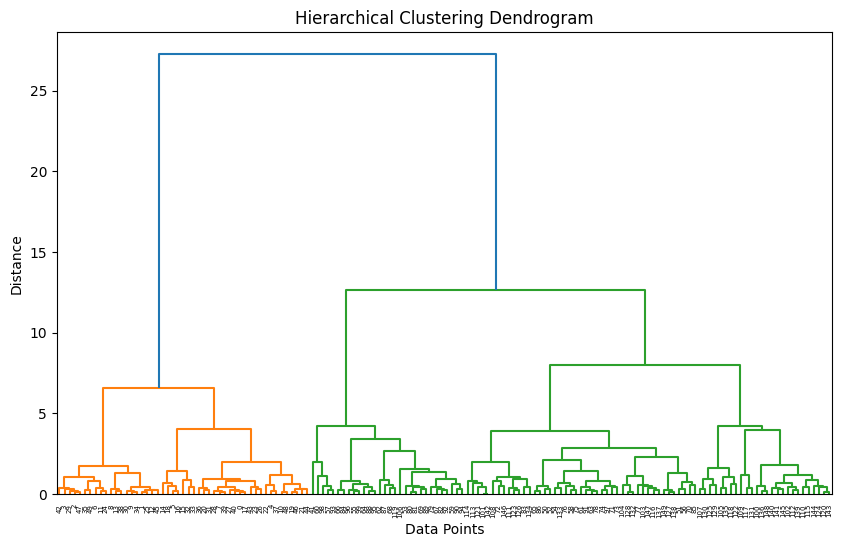

In [73]:
# Dendrogram Visualization
plt.figure(figsize=(10, 6))
dendrogram(linkage_ward)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


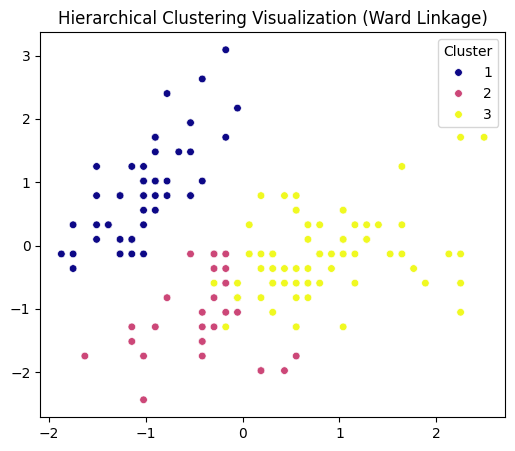

In [74]:
# Cluster Visualization
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1],
                hue=labels_ward, palette='plasma', s=30)
plt.title("Hierarchical Clustering Visualization (Ward Linkage)")
plt.legend(title='Cluster', loc='best')
plt.show()


## DBSCAN Clustering
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups data points based on density rather than distance.
It can find clusters of arbitrary shapes and also identify noise or outliers (points that don’t belong to any cluster).

Key Parameters:

  * eps: Maximum distance between two samples to be considered as neighbors.

  * min_samples: Minimum number of points needed to form a dense region (cluster).

Advantages:

  * No need to predefine the number of clusters (unlike K-Means).

  * Detects outliers automatically.

In [75]:
# DBSCAN Clustering
from sklearn.cluster import DBSCAN
print("Training DBSCAN Clustering.")
dbscan = DBSCAN(eps=0.7, min_samples=6)
labels_dbscan = dbscan.fit_predict(X_scaled)

# Unique labels
unique_labels = np.unique(labels_dbscan)
print("Unique cluster labels:", unique_labels)

# Remove noise points
mask = labels_dbscan != -1
if len(set(labels_dbscan)) > 1 and np.sum(mask) > 0:
    sil_dbscan = silhouette_score(X_scaled[mask], labels_dbscan[mask])
    ch_dbscan = calinski_harabasz_score(X_scaled[mask], labels_dbscan[mask])
    db_dbscan = davies_bouldin_score(X_scaled[mask], labels_dbscan[mask])
else:
    sil_dbscan = ch_dbscan = db_dbscan = None

print("\nModel Evaluation (DBSCAN Clustering)")
print("Silhouette Score:", sil_dbscan)
print("Calinski–Harabasz Index:", ch_dbscan)
print("Davies–Bouldin Index:", db_dbscan)

Training DBSCAN Clustering.
Unique cluster labels: [-1  0  1]

Model Evaluation (DBSCAN Clustering)
Silhouette Score: 0.6175277613371859
Calinski–Harabasz Index: 305.3175505102444
Davies–Bouldin Index: 0.5325813745463167


  * Unique cluster labels: [-1, 0, 1]
  * DBSCAN created 2 main clusters (0 and 1) and identified some noise points (-1) that don’t belong to any cluster.

* Silhouette Score: 0.6175
→ Indicates that clusters are well-separated and dense. A value closer to 1 means better clustering.

* Calinski–Harabasz Index: 305.31
→ High value shows clear and distinct cluster boundaries.

* Davies–Bouldin Index: 0.53
→ Lower value means better compactness and separation between clusters.

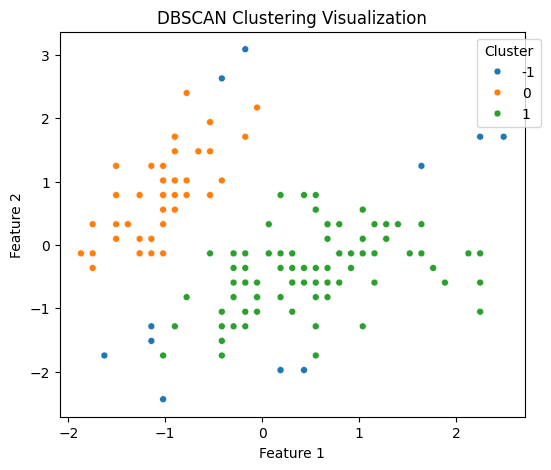

In [76]:
# Visualization
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1],
                hue=labels_dbscan, palette='tab10', s=25)
plt.title("DBSCAN Clustering Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title='Cluster', loc='best', bbox_to_anchor=(1.05, 1))
plt.show()

A comparative analysis helps evaluate which clustering algorithm performs best using different metrics.

The three main metrics are:

Silhouette Score: Measures cluster separation — higher is better.

Calinski–Harabasz Index: Measures cluster compactness — higher is better.

Davies–Bouldin Index: Measures cluster similarity — lower is better.

In [77]:
# Comparison of Models
summary_cluster = pd.DataFrame({
    'Model': ['K-Means', 'Hierarchical', 'DBSCAN'],
    'Silhouette Score': [sil_kmeans, sil_ward, sil_dbscan],
    'Calinski–Harabasz Index': [ch_kmeans, ch_ward, ch_dbscan],
    'Davies–Bouldin Index': [db_kmeans, db_ward, db_dbscan]
})

print("\nClustering Model Comparison Summary:")
summary_cluster



Clustering Model Comparison Summary:


,Model,Silhouette Score,Calinski–Harabasz Index,Davies–Bouldin Index
0,K-Means,0.581750,251.349339,0.593313
1,Hierarchical,0.446689,222.719164,0.803467
2,DBSCAN,0.617528,305.317551,0.532581


From the results:


DBSCAN gives the best performance overall with the highest Silhouette and Calinski–Harabasz values and lowest Davies–Bouldin index.


This shows that DBSCAN formed well-separated and dense clusters compared to K-Means and Hierarchical clustering.



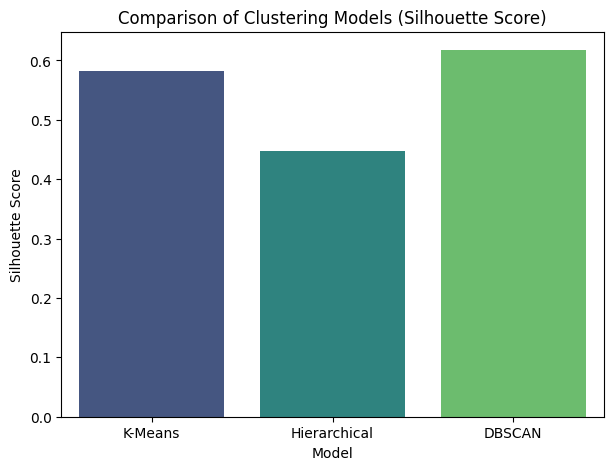

In [78]:
# Visualization
plt.figure(figsize=(7, 5))
sns.barplot(x='Model', y='Silhouette Score', hue='Model',
            data=summary_cluster, palette='viridis', legend=False)
plt.title("Comparison of Clustering Models (Silhouette Score)")
plt.xlabel("Model")
plt.ylabel("Silhouette Score")
plt.show()

## Conclusion

In the self-learning section, multiple clustering techniques were explored to compare their performance on the Iris dataset.
Using Elbow Method and Silhouette Score, the best number of clusters was found to be k = 2.
Then, Hierarchical Clustering (Ward Linkage) and DBSCAN were applied for comparison.

From the results:

* K-Means formed compact and clear clusters.

* Hierarchical Clustering gave moderate results with less separation.

* DBSCAN performed the best with high Silhouette and Calinski–Harabasz scores and a low Davies–Bouldin index, meaning it created the most natural and dense clusters.

Overall, this self-learning exercise improved understanding of how different clustering algorithms behave and how to evaluate them using performance metrics.